In [13]:
# 라이브러리 추출
import pandas as pd
import numpy as np
import tensorflow as tf

In [21]:
# 메서드 정의
def main(URL = 'D:/project/Teamproject1/JeseongMoon/Dataset/Regression_data.csv'):
    
    # 랜덤 시드 고정
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global df, LEARNING_RATE, EPOCH_COUNT, MB_SIZE, REPORT, TRAIN_RATIO, X, y, X_train, X_test, y_train, y_test, y_pred
    
    df = load_dataset(URL) # 데이터 로드
    Regression_Model() # 회귀 모델

In [22]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [26]:
from sklearn.model_selection import train_test_split
TRAIN_RATIO = 0.8
# 학습 데이터 분리
X = df.drop('target_class', axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14318, 8) (3580, 8) (14318,) (3580,)


In [27]:
X_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
13984,127.203125,52.269189,-0.222664,-0.101506,15.086120,54.658243,3.364636,9.392991
3126,52.968750,31.446367,3.410426,16.839254,41.168896,67.290303,1.648880,1.635625
13748,124.750000,35.676717,0.178535,1.837915,1.110368,11.973404,14.471259,246.172871
14864,100.164062,48.281689,0.561865,0.633153,1.925585,15.784724,9.617048,105.568196
17160,96.734375,46.709121,0.377105,0.152048,2.836120,18.707122,8.906146,92.142170


In [28]:
X_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
13971,118.890625,44.510223,0.223548,0.057119,1.369565,13.526842,14.222397,234.325537
4322,113.562500,47.418804,0.168827,-0.035996,2.205686,13.998608,10.654285,146.149662
14042,103.226562,40.028547,0.469162,0.883947,3.876254,19.969912,6.818652,54.926998
7102,123.609375,51.892352,0.288274,-0.199181,29.039298,67.633561,1.915681,1.718845
1003,134.960938,58.112418,-0.016643,-0.415690,4.735786,24.653527,6.325710,43.993983


In [30]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000
mean,110.979922,46.524674,0.477455,1.748246,12.444476,26.217401,8.333270,105.312684
std,25.526123,6.782110,1.052675,6.072202,29.200648,19.425697,4.491693,106.165624
min,5.812500,24.772042,-1.876011,-1.755332,0.213211,7.370432,-2.812353,-1.976976
25%,100.710938,42.362011,0.028368,-0.186510,1.917224,14.416392,5.797204,35.364865
50%,114.914062,46.954915,0.223197,0.197768,2.788880,18.415923,8.460192,83.517364
75%,127.015625,51.001216,0.476759,0.937653,5.414716,28.217723,10.721939,140.055368
max,192.617188,91.206475,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837


통합 프로필:
<br>
<br>평균: 평균 값은 대략 111으로 중앙값과 거의 비슷하며, 최소값과 최대값 사이에는 큰 차이가 있어 표준편차 값이 25.6으로 큽니다.
<br>표준 편차: 평균 표준 편차는 46.6으로 중앙값에 가깝고, 최소값과 최대값을 보면 데이터 세트 전체에 정규 분포가 나타나는 것으로 보입니다.
<br>초과 첨도: 데이터의 75% 이상이 0.5 아래에 있으며, 첨도가 낮은 경우 꼬리가 가벼우거나 이상치가 부족한 경향이 있습니다.
<br>비대칭도: 데이터의 75% 이상이 1.0 아래에 있어 통합 프로필의 대부분은 약간만 비대칭인 것으로 나타납니다.
<br>
<br>DM-SNR 곡선:
<br>
<br>평균: 표준 편차가 매우 높은 편입니다. 29로, 값의 75%가 5.6 아래에 있고 최대 값은 극단적으로 높습니다. 대부분의 곡선의 평균 값은 낮은 편이 될 것으로 기대할 수 있습니다.
<br>표준 편차: 이것도 최대 값이 매우 높아 보이며, 값의 75%가 28 아래에 있으며 중앙값은 19이고 평균은 26입니다. 평균의 높은 크기는 극단적으로 높은 값의 영향을 받은 것이지만, 해당 값들이 포함되지 않았다면 표준 편차는 중앙값 주변에 위치할 것으로 예상됩니다.
<br>초과 첨도: 값들은 상당히 높으며, 평균 값은 8.23이고 최대 값은 34입니다. 값들은 정규 분포를 나타내는 것으로 보입니다.
<br>비대칭도: 값들은 상당히 높으며, 평균 값은 102이고 최대 값은 1191으로 매우 높은 값을 가지고 있습니다. 이는 75분위 값과 비교했을 때 극도로 높은 값입니다.

In [32]:
print('For Train set')
for feature in X_train.columns:
    print('Missing values in feature ' + str(feature) + ' : ' + str(len(X_train[X_train[feature].isnull() == True])))

print('\n')
print('For Test set')
for feature in X_test.columns:
    print('Missing values in feature ' + str(feature) + ' : ' + str(len(X_test[X_test[feature].isnull() == True])))

For Train set
Missing values in feature  Mean of the integrated profile : 0
Missing values in feature  Standard deviation of the integrated profile : 0
Missing values in feature  Excess kurtosis of the integrated profile : 0
Missing values in feature  Skewness of the integrated profile : 0
Missing values in feature  Mean of the DM-SNR curve : 0
Missing values in feature  Standard deviation of the DM-SNR curve : 0
Missing values in feature  Excess kurtosis of the DM-SNR curve : 0
Missing values in feature  Skewness of the DM-SNR curve : 0


For Test set
Missing values in feature  Mean of the integrated profile : 0
Missing values in feature  Standard deviation of the integrated profile : 0
Missing values in feature  Excess kurtosis of the integrated profile : 0
Missing values in feature  Skewness of the integrated profile : 0
Missing values in feature  Mean of the DM-SNR curve : 0
Missing values in feature  Standard deviation of the DM-SNR curve : 0
Missing values in feature  Excess kurt

In [34]:
y_train.value_counts(1)

0    0.909345
1    0.090655
Name: target_class, dtype: float64

In [35]:
y_train.value_counts()

0    13020
1     1298
Name: target_class, dtype: int64

c:\Users\82105\anaconda3\envs\project1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target_class', ylabel='count'>

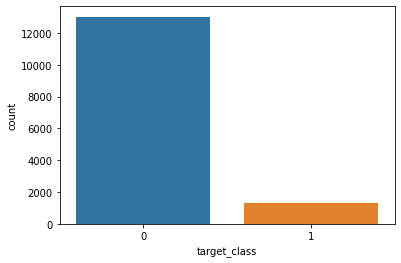

In [39]:
import seaborn as sns
sns.countplot(y_train)

<br>데이터셋은 매우 불균형합니다. 
<br>펄서가 1,153개이고 펄서가 아닌 것은 11,375개입니다. 
<br>모델 구축 과정 전에 데이터셋을 샘플링해야 할 수도 있습니다.
<br>
<br>분류 모델을 평가하기 위해 고려해야 할 가장 중요한 지표는 F1 점수와 재현율입니다. 
<br>이는 대상 클래스가 극도로 적기 때문에 중요합니다.

<AxesSubplot:>

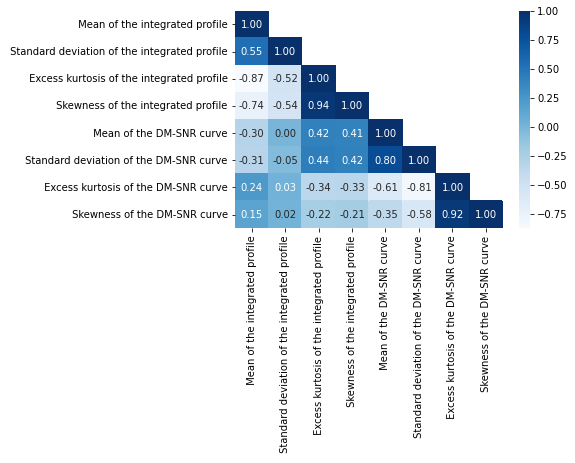

In [42]:
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='Blues',mask=np.triu(X_train.corr(),+1))

<br>2개의 종속 변수 간의 상관 관계:
<br>
<br>높은 양의 상관 관계:
<br>
<br>편향된 통합 프로필의 왜도와 DM-SNR 곡선의 초과 첨도
<br>DM-SNR 곡선의 왜도와 DM-SNR 곡선의 초과 첨도
<br>DM-SNR 곡선의 평균과 표준 편차
<br>---------------------------------------------------
<br>높은 음의 상관 관계:
<br>
<br>통합 프로필의 평균과 통합 프로필의 초과 첨도
<br>통합 프로필의 평균과 통합 프로필의 왜도
<br>DM-SNR 곡선의 초과 첨도와 표준 편차
<br>---------------------------------------------------
<br>독립 변수와 종속 변수 간의 상관 관계:
<br>
<br>통합 프로필의 초과 첨도와 통합 프로필의 왜도는 Target_class와 높은 양의 상관 관계를 가지고 있습니다. 
<br>통합 프로필의 평균은 Target_class와 높은 음의 상관 관계를 가지고 있습니다.
<br>
<br>상관 관계는 데이터에서 다중공선성을 나타내며, 
<br>모델 구축 과정에서 바람직하지 않으므로 데이터 전처리 과정에서 처리되어야 합니다.

In [45]:
y_train_1 = y_train[y_train == 1] #creating a dataset for only true pulsars for EDA
y_train_0 = y_train[y_train == 0] #creating a dataset for only non pulsars for EDA
print(y_train_1.shape, y_train_0.shape)

(1298,) (13020,)



<br>통합 프로필:
<br>
<br>평균: 이상치가 없으며, 약간 오른쪽으로 치우친 분포입니다. 평균은 56.52이고 표준 편차는 29.81입니다.
<br>표준 편차: 이상치가 있으며, 오른쪽으로 치우친 분포입니다. 평균은 38.7이고 표준 편차는 7.87입니다.
<br>초과 첨도: 이상치가 없으며, 약간 오른쪽으로 치우친 분포입니다. 평균은 3.12이고 표준 편차는 1.87입니다.
<br>왜도: 이상치가 있으며, 오른쪽으로 치우친 분포입니다. 평균은 15.56이고 표준 편차는 14.14입니다.
<br>
<br>일반적으로 정규 분포를 따른다고 가정한다면, 펄서 별의 통합 프로필은 평균 약 56, 높은 표준 편차 약 38, 
<br>평균 왜도 약 15로 오른쪽으로 치우친 경향을 가지며, 평균 초과 첨도 약 3.12으로 
<br>매우 뾰족한 곡선과 두꺼운 꼬리를 가질 것으로 예상할 수 있습니다.

<br>DM-SNR 곡선:
<br>
<br>평균: 이상치가 매우 적게 있으며, 오른쪽으로 치우친 분포입니다. 평균은 44.91이고 표준 편차는 45.13입니다.
<br>표준 편차: 이상치가 없으며, 약간 오른쪽으로 치우친 분포입니다. 평균은 56.92이고 표준 편차는 19.73입니다.
<br>초과 첨도: 이상치가 있으며, 극단적으로 오른쪽으로 치우친 분포입니다. 평균은 2.78이고 표준 편차는 3.20입니다.
<br>왜도: 이상치가 있으며, 극단적으로 오른쪽으로 치우친 분포입니다. 평균은 17.93이고 표준 편차는 46.92입니다.
<br>
<br>일반적으로 정규 분포를 따른다고 가정한다면, 펄서 별의 DM-SNR 곡선은 평균 약 45, 높은 표준 편차 약 57, 
<br>평균 왜도 약 18로 오른쪽으로 치우친 경향을 가지며, 평균 초과 첨도 약 2.78으로 
<br>매우 뾰족한 곡선과 두꺼운 꼬리를 가질 것으로 예상할 수 있습니다.

<br>Integrated Profile (통합 프로필):
<br>
<br>평균: 이상치가 있으며, 평균은 116.56이고 표준 편차는 17.43입니다. 정규 분포에 가까운 형태입니다.
<br>표준 편차: 이상치가 있으며, 평균은 47.31이고 표준 편차는 6.15입니다. 거의 정규 분포에 가깝지만 오른쪽으로 꼬리가 있습니다.
<br>초과 첨도: 이상치가 있으며, 평균은 0.20이고 표준 편차는 0.33입니다. 양쪽 꼬리를 가진 거의 정규 분포에 가깝습니다.
<br>왜도: 이상치가 있으며, 오른쪽으로 치우친 분포입니다. 평균은 0.38이고 표준 편차는 0.98입니다.

<br>일반적으로 정규 분포를 따른다고 가정한다면, 비펄서 별의 통합 프로필은 평균 약 117, 높은 표준 편차 약 47, 
<br>왜도가 거의 없는 분포 (평균 왜도 약 0.38)를 가질 것으로 예상할 수 있으며, 약간 뾰족한 곡선을 가질 것으로 예상됩니다 (평균 초과 첨도 약 0.38).
<br>
<br>DM-SNR Curve (DM-SNR 곡선):
<br>
<br>평균: 이상치가 몇 개 있으며, 극단적으로 오른쪽으로 치우친 분포입니다. 평균은 8.90이고 표준 편차는 24.59입니다.
<br>표준 편차: 이상치가 몇 개 있으며, 오른쪽으로 치우친 분포입니다. 평균은 23.24이고 표준 편차는 16.71입니다.
<br>초과 첨도: 이상치가 있으며, 약간 오른쪽으로 치우친 분포입니다. 평균은 8.89이고 표준 편차는 4.26입니다.
<br>왜도: 이상치가 있으며, 오른쪽으로 치우친 분포입니다. 평균은 114.36이고 표준 편차는 107.81입니다.
<br>
<br>일반적으로 정규 분포를 따른다고 가정한다면, 비펄서 별의 DM-SNR 곡선은 평균 약 9, 높은 표준 편차 약 23, 
<br>오른쪽으로 치우친 분포 (평균 왜도 약 114)를 가질 것으로 예상되며, 
<br>약간 뾰족한 곡선과 두꺼운 꼬리를 가질 것으로 예상됩니다 (평균 초과 첨도 약 8.89).